In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from matplotlib import pyplot
import astropy.constants
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [3]:
def magnitude(vector):
    return np.sqrt(vector[0] ** 2.0 + vector[1] ** 2.0 + vector[2] ** 2.0)

In [4]:
class Particle(object):
    def __init__(self, initial_position, initial_velocity, mass, number_time_steps):
        self.position = np.zeros((number_time_steps, 3))
        self.position[0] = initial_position
        self.velocity =  np.zeros((number_time_steps, 3))
        self.velocity[0] = initial_velocity
        self.acceleration = np.zeros((number_time_steps, 3))
        self.mass = mass
        self.pvec = np.zeros((number_time_steps, 3))
        self.pvec[0] = mass * np.cross(initial_position, initial_velocity)
        self.pmag = np.zeros((number_time_steps, 1))
        self.pmag[0] = magnitude(mass * np.cross(initial_position, initial_velocity))
        self.emag = np.zeros((number_time_steps, 1))
        self.speed = np.zeros((number_time_steps, 1))
        self.speed[0] = magnitude(initial_velocity)
        
    def update_position(self, t):
        self.position[t] = self.position[t - 1]
        self.position[t] += self.velocity[t - 1] * delta_t
        self.position[t] += 0.5 * self.acceleration[t - 1] * delta_t * delta_t
    
    def update_velocity(self, t):
        self.velocity[t] = self.velocity[t - 1]
        self.velocity[t] += 0.5 * delta_t * (self.acceleration[t] + self.acceleration[t - 1])
    
    def update_acceleration(self, t, particles):
        for particle in particles:
            if particle != self:
                r12 = particle.vector_to(self.position, t)
                self.acceleration[t] += G * np.asarray(particle.mass) * r12 / magnitude(r12) ** 3.0
        
    def vector_to(self, position1, t):
        return self.position[t] - position1[t]
    
    def p_vector(self, t):
        self.pvec[t] = self.mass * np.cross(self.position[t], self.velocity[t])
        
    def p_magnitude(self, t):
        self.pmag[t] = magnitude(self.pvec[t])
        
    def e_magnitude(self, t, particles):
        for particle in particles:
            if particle != self:
                r12 = particle.vector_to(self.position, t)
                self.emag[t] = 0.5 * self.mass * np.dot(self.velocity[t], self.velocity[t]) -G * self.mass * np.asarray(particle.mass) / magnitude(r12)
                
    def update_speed(self, t):
        self.speed[t] = magnitude(self.velocity[t])

In [17]:
number_of_time_steps = 100000
delta_t = 5.0
G = astropy.constants.G.to('AU**3 / (day**2 * earthMass)').value
mass = 1

In [18]:
theta1 = np.deg2rad(90)
x1 = 1.2 * np.cos(theta1)
y1 = 1.2 * np.sin(theta1)
z1 = 0
r_1 = [x1, y1, z1]

theta1dot = (G / np.sqrt(3)) ** (1 / 2)
x1dot = - np.sin(theta1) * theta1dot
y1dot = np.cos(theta1) * theta1dot
z1dot = 0
v_1 = [x1dot, y1dot, z1dot]

theta2 = np.deg2rad(210)
x2 = np.cos(theta2)
y2 = np.sin(theta2)
z2 = 0
r_2 = [x2, y2, z2]

theta2dot = (G / np.sqrt(3)) ** (1 / 2)
x2dot = - np.sin(theta2) * theta2dot
y2dot = np.cos(theta2) * theta2dot
z2dot = 0
v_2 = [x2dot, y2dot, z2dot]

theta3 = np.deg2rad(330)
x3 = np.cos(theta3)
y3 = np.sin(theta3)
z3 = 0
r_3 = [x3, y3, z3]

theta3dot = (G / np.sqrt(3)) ** (1 / 2)
x3dot = - np.sin(theta3) * theta3dot
y3dot = np.cos(theta3) * theta3dot
z3dot = 0
v_3 = [x3dot, y3dot, z3dot]

In [19]:
object1 = Particle(r_1, v_1, mass, number_of_time_steps)
object2 = Particle(r_2, v_2, mass, number_of_time_steps)
object3 = Particle(r_3, v_3, mass, number_of_time_steps)

In [20]:
particles = [object1, object2, object3]

In [21]:
for particle in particles:
    particle.update_acceleration(0, particles)
    particle.e_magnitude(0, particles)

In [22]:
for t in np.arange(1, number_of_time_steps):
    for particle in particles:
        particle.update_position(t)
    for particle in particles:
        particle.update_acceleration(t, particles)
    for particle in particles:
        particle.update_velocity(t)
    for particle in particles:
        particle.p_vector(t)
    for particle in particles:
        particle.p_magnitude(t)
    for particle in particles:
        particle.e_magnitude(t, particles)
    for particle in particles:
        particle.update_speed(t)

<IPython.core.display.Javascript object>


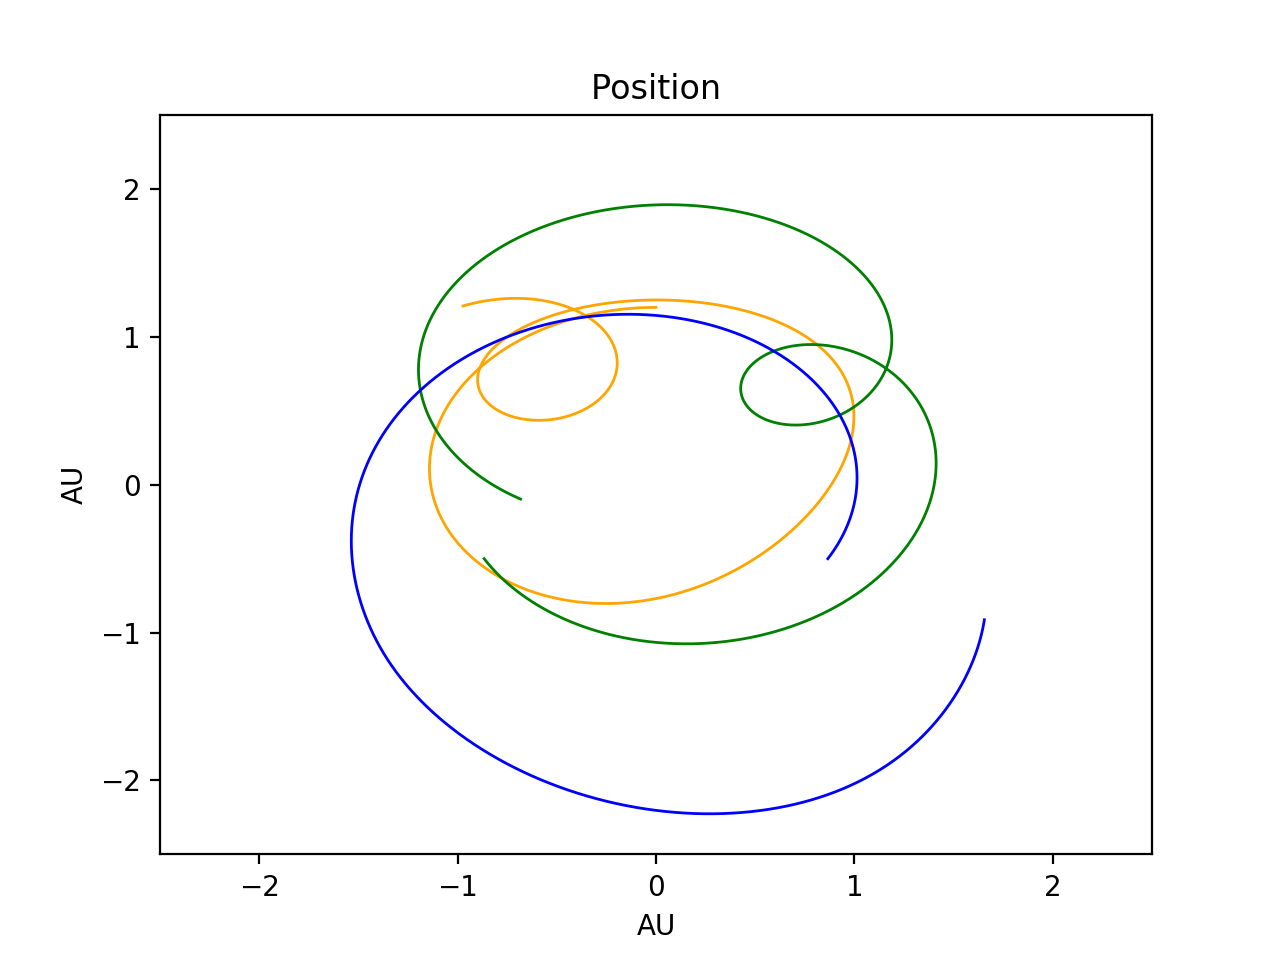

Text(0,0.5,'AU')

In [25]:
pyplot.plot(object1.position[:, 0], object1.position[:, 1], linewidth = 1, color = 'orange')
pyplot.plot(object2.position[:, 0], object2.position[:, 1], linewidth = 1, color = 'green')
pyplot.plot(object3.position[:, 0], object3.position[:, 1], linewidth = 1, color = 'blue')

pyplot.title("Position")
pyplot.xlim(-2.5, 2.5)
pyplot.ylim(-2.5, 2.5)
pyplot.xlabel("AU")
pyplot.ylabel("AU")

<IPython.core.display.Javascript object>


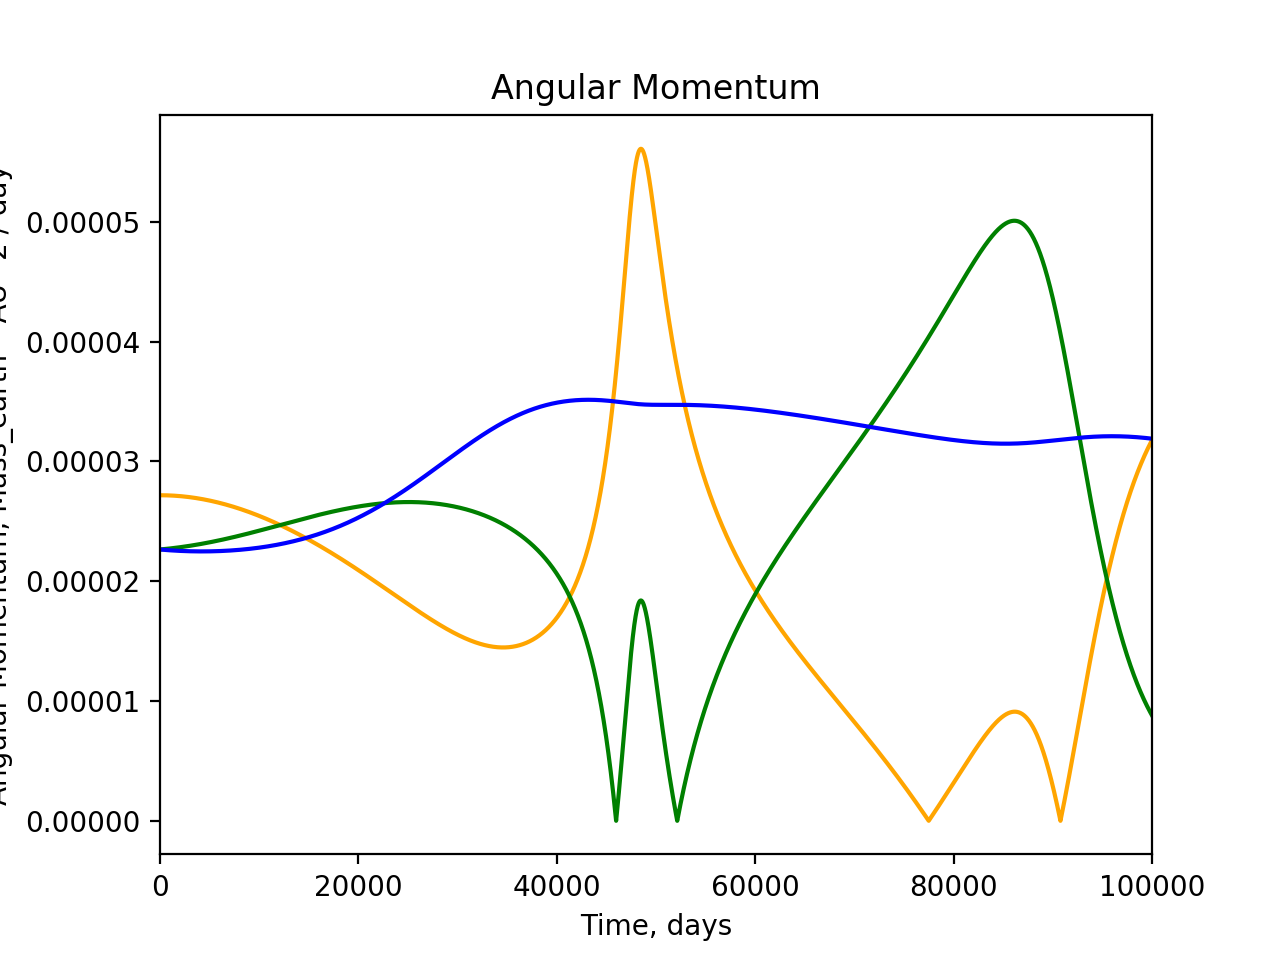

Text(0,0.5,'Angular Momentum, Mass_earth * AU^2 / day')

In [26]:
pyplot.plot(np.arange(0, number_of_time_steps, 1), object1.pmag, color='orange')
pyplot.plot(np.arange(0, number_of_time_steps, 1), object2.pmag, color='green')
pyplot.plot(np.arange(0, number_of_time_steps, 1), object3.pmag, color='blue')

pyplot.xlim(0, number_of_time_steps)
pyplot.title("Angular Momentum")
pyplot.xlabel("Time, days")
pyplot.ylabel("Angular Momentum, Mass_earth * AU^2 / day")

<IPython.core.display.Javascript object>


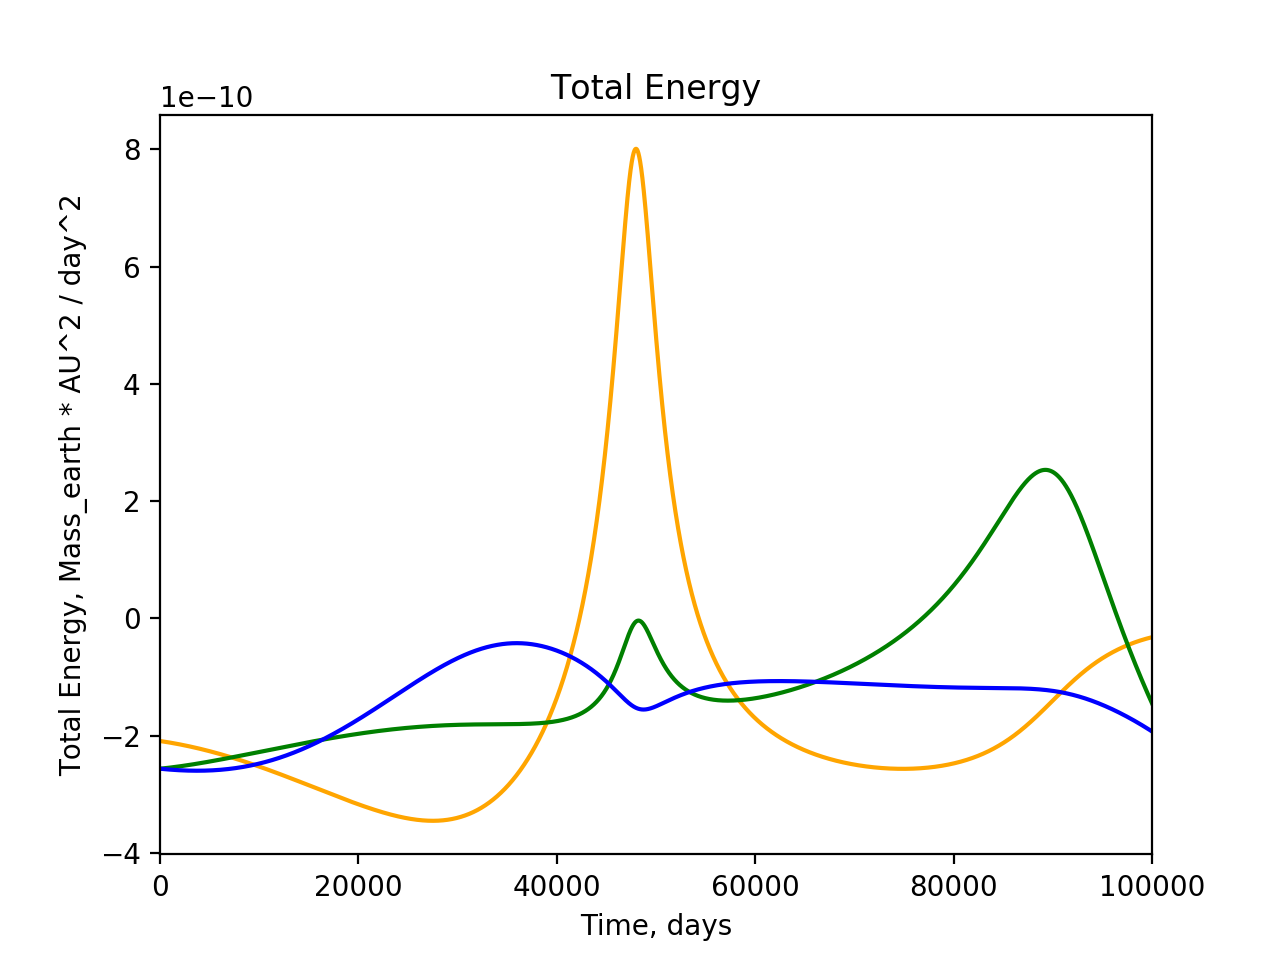

Text(0,0.5,'Total Energy, Mass_earth * AU^2 / day^2')

In [27]:
pyplot.plot(np.arange(0, number_of_time_steps, 1), object1.emag, color='orange')
pyplot.plot(np.arange(0, number_of_time_steps, 1), object2.emag, color='green')
pyplot.plot(np.arange(0, number_of_time_steps, 1), object3.emag, color='blue')

pyplot.xlim(0, number_of_time_steps)
pyplot.title("Total Energy")
pyplot.xlabel("Time, days")
pyplot.ylabel("Total Energy, Mass_earth * AU^2 / day^2")